# First Example: Plotting a White Noise Process

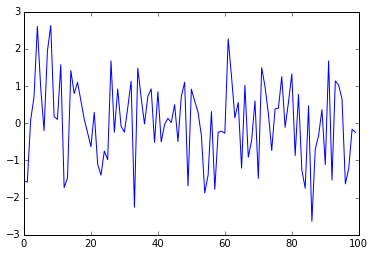

In [7]:
from random import normalvariate
import matplotlib.pyplot as plt
%matplotlib inline

ts_length = 100
epsilon_values = []   # An empty list
for i in range(ts_length):
    e = normalvariate(0, 1)
    epsilon_values.append(e)
plt.plot(epsilon_values, 'b-')
plt.show()

### 1 User-Defined Functions

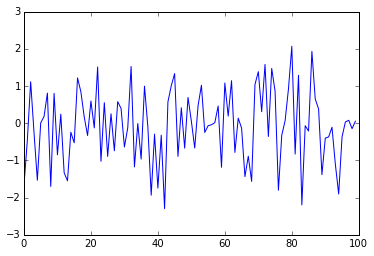

In [3]:
from random import normalvariate
import matplotlib.pyplot as plt


def generate_data(n):
    epsilon_values = []
    for i in range(n):
        e = normalvariate(0, 1)
        epsilon_values.append(e)
    return epsilon_values

data = generate_data(100)
plt.plot(data, 'b-')
plt.show()

### 2 Conditions¶

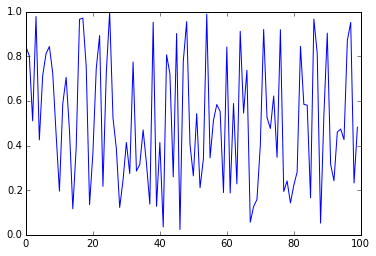

In [4]:
from random import normalvariate, uniform
import matplotlib.pyplot as plt


def generate_data(n, generator_type):
    epsilon_values = []
    for i in range(n):
        if generator_type == 'U':
            e = uniform(0, 1)
        else:
            e = normalvariate(0, 1)
        epsilon_values.append(e)
    return epsilon_values

data = generate_data(100, 'U')
plt.plot(data, 'b-')
plt.show()

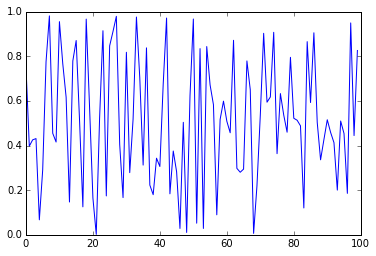

In [5]:
from random import normalvariate, uniform
import matplotlib.pyplot as plt


def generate_data(n, generator_type):
    epsilon_values = []
    for i in range(n):
        e = uniform(0, 1) if generator_type == 'U' else normalvariate(0, 1)
        epsilon_values.append(e)
    return epsilon_values

data = generate_data(100, 'U')
plt.plot(data, 'b-')
plt.show()


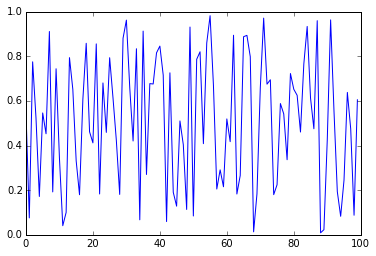

In [6]:
from random import uniform
import matplotlib.pyplot as plt


def generate_data(n, generator_type):
    epsilon_values = []
    for i in range(n):
        e = generator_type(0, 1)
        epsilon_values.append(e)
    return epsilon_values

data = generate_data(100, uniform)
plt.plot(data, 'b-')
plt.show()

### 3 List Comprehensions

In [8]:
animals = ['dog', 'cat', 'bird']

plurals = [animal + 's' for animal in animals]

plurals

['dogs', 'cats', 'birds']

In [10]:
range(8)

doubles = [2 * x for x in range(8)]

doubles

[0, 2, 4, 6, 8, 10, 12, 14]

### 4 Using the Scientific Libraries

In [11]:
from numpy.random import randn

epsilon_values = randn(5)

epsilon_values

array([ 0.55129498,  0.60990472,  0.91143614, -0.17529696, -0.39265843])

Exercise 1

Recall that n! is read as “n factorial” and defined as n!=n×(n−1)×⋯×2×1

There are functions to compute this in various modules, but let’s write our own version as an exercise

In particular, write a function factorial such that factorial(n) returns n! for any positive integer n

In [18]:
def factorial(n):
    result = 1
    for i in range(n):
        result = result * (i+1)
    return result

print factorial(5)
        

120


Exercise 2

The binomial random variable Y∼Bin(n,p) represents the number of successes in n binary trials, where each trial succeeds with probability p

Without any import besides from random import uniform, write a function binomial_rv such that binomial_rv(n, p) generates one draw of Y

Hint: If U is uniform on (0,1) and p∈(0,1), then the expression U < p evaluates to True with probability p

In [26]:
from random import uniform

def binomial_rv(n, p):
    result = 0
    for i in range(n):
        if uniform(0,1) < p:
            result = result + 1
    return result

print binomial_rv(5,0.4)
    

2


Exercise 3

Compute an approximation to π using Monte Carlo. Use no imports besides

In [33]:
from random import uniform
from math import sqrt

def Monte_Carlo_pi(simu_num):
    count_num = 0
    
    for i in range(simu_num):
        if sqrt(uniform(0,1)**2 + uniform(0,1)**2) < 1.0:
            count_num = count_num +1
            
    return 4.0*count_num/simu_num

print Monte_Carlo_pi(5000000)

3.14155176


Exercise 4

Write a program that prints one realization of the following random device:

    Flip an unbiased coin 10 times
    If 3 consecutive heads occur one or more times within this sequence, pay one dollar
    If not, pay nothing

Use no import besides from random import uniform

In [1]:
from random import uniform

def payment():
    
    n = 10
    payment = 0
    count = 0
    max_count = 0
    
    for i in range(10):
        if uniform(0, 1) > 0.5:
            count = count + 1
        else: 
            count = 0
        if count > max_count:
            max_count = count
    if max_count >= 3:
        payment = payment + 1
    else:
        payment = 0
        
    return max_count, payment

for i in range(10):
    print payment()

(3, 1)
(2, 0)
(5, 1)
(4, 1)
(2, 0)
(3, 1)
(2, 0)
(3, 1)
(2, 0)
(3, 1)


Exercise 5

Your next task is to simulate and plot the correlated time series
xt+1=αxt+εt+1wherex0=0andt=0,…,T

The sequence of shocks {εt} is assumed to be iid and standard normal

In your solution, restrict your import statements to

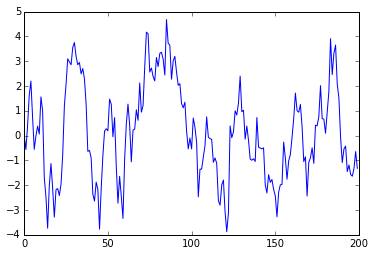

In [2]:
import matplotlib.pyplot as plt
from random import normalvariate
%matplotlib inline
   
def series(T, alpha):
    x = []
    for i in range(T):
        if i == 0:
            last_data = 0
        else:
            last_data = alpha * last_data + normalvariate(0, 1)

        x.append(last_data)
        
    return x


data = series(200, 0.9)
#print data

plt.plot(data, 'b-')
plt.show()
    

Exercise 6

To do the next exercise, you will need to know how to produce a plot legend

The following example should be sufficient to convey the idea

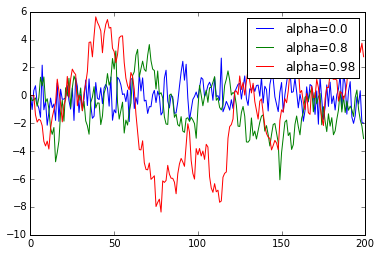

In [4]:
from pylab import plot, show, legend
from random import normalvariate
%matplotlib inline


def series(T, alpha):
    x = []
    for i in range(T):
        if i == 0:
            last_data = 0
        else:
            last_data = alpha * last_data + normalvariate(0, 1)

        x.append(last_data)
        
    return x

T =200
for alpha in {0.0,0.8,0.98}:
    data =series(T, alpha)
    plt.plot(data, label='alpha='+str(alpha))
    plt.legend()

plt.show()